In [1]:
#Loading gensim and nltk libraries
import pandas as pd
import gensim
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS
from nltk.stem import WordNetLemmatizer
from nltk.stem import SnowballStemmer
from nltk.stem.porter import *
import numpy as np
from gensim.models.coherencemodel import CoherenceModel
from gensim.models.ldamodel import LdaModel
np.random.seed(2018)
import nltk
nltk.download('wordnet')


[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/Cielseal/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [2]:
toiletWords = ['http', 'author', 'toilet', 'toilets', 'dirty', 'pee', 'shit', 'urine', 'poop', 'cleaner', 'smelly', 'disgusting', 'puking', 'urinal', 'cubicle', 'seat cover', 'paper', 'flush']

In [3]:
#method for lemmatization and stemming
def preprocess(text):
    try:
        result = []
        for token in gensim.utils.simple_preprocess(text):
            if token not in gensim.parsing.preprocessing.STOPWORDS and len(token) > 3:
                if token not in toiletWords:
                    #result.append(lemmatize_stemming(token))
                    result.append(token)
        #print(result)
        return result
    except:
        return []
def lemmatize_stemming(text):
    stemmer = SnowballStemmer("english")
    return stemmer.stem(WordNetLemmatizer().lemmatize(text, pos='v'))


In [4]:
posts = pd.read_csv('toilet_Reddit_output_test_02_11_2019.csv')
posts = posts.replace(np.nan, ' ', regex=True)
posts.head(3)

,author,title,score,id,url,comms_num,created,body,timestamp,top_main_comment
0,ModernCrusader25,Do you leave a feedback on the cleanliness of ...,56,dj0ecy,https://www.reddit.com/r/singapore/comments/dj...,40,1.571310e+09,Referring to those toilets which have a mini t...,2019-10-17 19:07:38,\n=== Author: zanezki===\ni always do this on ...
1,Jammy_buttons2,Singaporean undergraduate charged with filming...,83,dc79yf,https://sg.news.yahoo.com/singaporean-undergra...,58,1.570033e+09,,2019-10-03 00:15:55,\n=== Author: mylifeforthehorde===\nDon’t thes...
2,stforumtroll,Singaporean studying at top British university...,77,dcb28j,https://www.straitstimes.com/singapore/courts-...,32,1.570056e+09,,2019-10-03 06:36:36,\n=== Author: FitCranberry===\ncultural export...


In [5]:
posts['combined_body'] = posts['title'] + ' ' + posts['body'] + ' ' + posts['top_main_comment']

In [6]:
posts['combined_body'][2]

'Singaporean studying at top British university charged in court after allegedly filming women in toilets   \n=== Author: FitCranberry===\ncultural export I see\n\n=== Author: CaptainBooger===\nThe uni was mentioned a few hours ago, when did removing the name of the school be required?\n\n=== Author: omnirai===\nOffences took place on Dec 2015 and Dec 2016. \n\nBefore the NOT AGAIN LUL people come in.\n\n=== Author: fijimermaidsg===\nThere’s a real crime wave in SG, unfortunately it only affects women in toilets.\n\nWhat’s the point of being able to walk around in the middle of the night when you can’t use the bathroom without being filmed by some pervert with a degree?\n\n=== Author: OxonianinNYU===\nAm old grad from said uni. It was a dead giveaway when the reporter said "...started 7th October last year". Only one uni in Britain starts that late (Camb starts a week before iirc)\n\n=== Author: thamometer===\n🤦🏻\u200d♂\n\n=== Author: zjllee===\nWhy gag order for him and not the yale-n

In [7]:
posts['combined_body'] = posts['combined_body'].map(preprocess)
print('Pre-processing is done.')

Pre-processing is done.


In [8]:
#building dictionary and corpus for LDA
dictionary = gensim.corpora.Dictionary(posts['combined_body'])
corpus = [dictionary.doc2bow(text) for text in posts['combined_body']]
count = 0
for k, v in dictionary.iteritems():
    print(k, v)
    count += 1
    if count > 10:
        break
print('Dictionary is built.')

0 accompany
1 actually
2 airport
3 allow
4 annualdegree
5 anthropoid
6 appreciate
7 auntie
8 aunties
9 aunty
10 aurebesh
Dictionary is built.


In [9]:
#Generate Bag of Words on the data set
bow_corpus = [dictionary.doc2bow(text) for text in posts['combined_body']]
#generate TFIDF matrix
from gensim import corpora, models
tfidf = models.TfidfModel(bow_corpus)
corpus_tfidf = tfidf[bow_corpus]
from pprint import pprint
for doc in corpus_tfidf:
    pprint(doc)
    break

[(0, 0.05971446717715799),
 (1, 0.01336589234120983),
 (2, 0.19918372485797964),
 (3, 0.031377637203348276),
 (4, 0.04474352954455811),
 (5, 0.05971446717715799),
 (6, 0.11334731989523888),
 (7, 0.035297919553288204),
 (8, 0.04082324719461818),
 (9, 0.05026885718588809),
 (10, 0.03778243996507963),
 (11, 0.03319728747632994),
 (12, 0.05971446717715799),
 (13, 0.04474352954455811),
 (14, 0.012919061009055221),
 (15, 0.02673178468241966),
 (16, 0.08948705908911622),
 (17, 0.05026885718588809),
 (18, 0.03778243996507963),
 (19, 0.027038025316042515),
 (20, 0.05026885718588809),
 (21, 0.04474352954455811),
 (22, 0.05971446717715799),
 (23, 0.04474352954455811),
 (24, 0.05170461912403659),
 (25, 0.04474352954455811),
 (26, 0.01640669957074839),
 (27, 0.021105887324899313),
 (28, 0.04082324719461818),
 (29, 0.11942893435431598),
 (30, 0.05971446717715799),
 (31, 0.1511297598603185),
 (32, 0.02281150233247974),
 (33, 0.05971446717715799),
 (34, 0.13125359656598712),
 (35, 0.03319728747632994)

In [10]:
def compute_coherence_values(dictionary, corpus, texts, limit, start, step, coherence):
    """
    Compute c_v coherence for various number of topics

    Parameters:
    ----------
    dictionary : Gensim dictionary
    corpus : Gensim corpus
    texts : List of input texts
    limit : Max num of topics

    Returns:
    -------
    model_list : List of LDA topic models
    coherence_values : Coherence values corresponding to the LDA model with respective number of topics
    """
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model=LdaModel(corpus=corpus, id2word=dictionary, num_topics=num_topics)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence=coherence)
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values

In [11]:
start = 5
limit = 41
step = 5

try:
    model_list, coherence_values_umass = compute_coherence_values(dictionary=dictionary, 
                                                        corpus=corpus, texts=posts['combined_body'], 
                                                        start=start, limit=limit, step=step, coherence='u_mass')
except Exception as e:
    print(e)

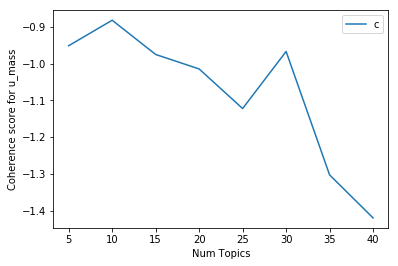

In [13]:
start = 5
limit = 41
step = 5
# Show graph
import matplotlib.pyplot as plt
x = range(start, limit, step)
plt.plot(x, coherence_values_umass)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score for u_mass")
plt.legend(("coherence_values"), loc='best')
plt.show()

In [14]:
#run LDA
#change num_topics if want to change the number of topics generated
lda_model = gensim.models.LdaModel(corpus, num_topics=15, id2word=dictionary, random_state=100,
                                           update_every=1,
                                           chunksize=10,
                                           passes=10,
                                           alpha='symmetric',
                                           iterations=100,
                                           per_word_topics=True)


In [15]:
for idx, topic in lda_model.print_topics(-1):
    print('Topic: {} \nWords: {}'.format(idx, topic))

Topic: 0 
Words: 0.050*"chinese" + 0.021*"characters" + 0.020*"pinyin" + 0.012*"english" + 0.008*"hanyu" + 0.007*"words" + 0.007*"language" + 0.007*"written" + 0.006*"greek" + 0.006*"korean"
Topic: 1 
Words: 0.009*"wash" + 0.008*"drink" + 0.007*"uncle" + 0.007*"went" + 0.007*"dick" + 0.006*"like" + 0.006*"sink" + 0.006*"public" + 0.006*"doors" + 0.005*"nuisance"
Topic: 2 
Words: 0.027*"squatting" + 0.010*"readme" + 0.009*"rating" + 0.008*"hardpieceofrock" + 0.008*"cough" + 0.007*"airport" + 0.006*"cleanliness" + 0.006*"capable" + 0.005*"blob" + 0.005*"squats"
Topic: 3 
Words: 0.021*"people" + 0.016*"like" + 0.012*"time" + 0.011*"think" + 0.010*"know" + 0.008*"want" + 0.008*"deleted" + 0.007*"sure" + 0.007*"need" + 0.007*"https"
Topic: 4 
Words: 0.042*"school" + 0.016*"haunted" + 0.011*"bullying" + 0.009*"video" + 0.007*"bully" + 0.007*"students" + 0.007*"victim" + 0.007*"mosquito" + 0.006*"doesnt" + 0.006*"kids"
Topic: 5 
Words: 0.015*"phone" + 0.012*"door" + 0.012*"property" + 0.008*"

In [16]:
import pyLDAvis.gensim
pyLDAvis.enable_notebook()
pyLDAvis.gensim.prepare(lda_model, corpus, dictionary)

/Users/Cielseal/anaconda3/lib/python3.7/site-packages/pyLDAvis/_prepare.py:257: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  return pd.concat([default_term_info] + list(topic_dfs))


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
3      0.346579 -0.112661       1        1  29.924133
7      0.151408  0.236580       2        1  21.634192
9      0.107783  0.140852       3        1   8.239407
13    -0.101897 -0.011775       4        1   7.417782
5      0.025837 -0.117173       5        1   6.881414
10     0.027462 -0.169985       6        1   6.573546
1      0.043789 -0.028532       7        1   5.350270
0     -0.100462 -0.002954       8        1   3.941711
4     -0.077695 -0.010220       9        1   2.272820
14    -0.066645  0.018167      10        1   2.120888
2     -0.069728  0.017114      11        1   2.072259
6     -0.074354  0.008008      12        1   1.306579
8     -0.072583  0.003736      13        1   1.066263
11    -0.066043  0.011837      14        1   0.647369
12    -0.073453  0.017006      15        1   0.551376, topic_info=     Category        Freq            Term       Total  loglift  logprob
term                                                                   
1117  Default   87.000000         chinese   87.000000  30.0000  30.0000
2420  Default  191.000000           water  191.000000  29.0000  29.0000
664   Default   63.000000          school   63.000000  28.0000  28.0000
151   Default  311.000000          people  311.000000  27.0000  27.0000
686   Default  205.000000       singapore  205.000000  26.0000  26.0000
69    Default   55.000000          female   55.000000  25.0000  25.0000
34    Default   79.000000           clean   79.000000  24.0000  24.0000
615   Default  153.000000          public  153.000000  23.0000  23.0000
120   Default  348.000000            like  348.000000  22.0000  22.0000
893   Default   70.000000          police   70.000000  21.0000  21.0000
306   Default   72.000000            case   72.000000  20.0000  20.0000
183   Default   99.000000            said   99.000000  19.0000  19.0000
3572  Default   32.000000      characters   32.000000  18.0000  18.0000
591   Default   40.000000           phone   40.000000  17.0000  17.0000
957   Default   46.000000            door   46.000000  16.0000  16.0000
3608  Default   31.000000          pinyin   31.000000  15.0000  15.0000
4116  Default   25.000000       squatting   25.000000  14.0000  14.0000
1010  Default   44.000000            post   44.000000  13.0000  13.0000
238   Default   97.000000            want   97.000000  12.0000  12.0000
111   Default  160.000000            know  160.000000  11.0000  11.0000
248   Default   53.000000            year   53.000000  10.0000  10.0000
458   Default  149.000000           https  149.000000   9.0000   9.0000
222   Default  146.000000           think  146.000000   8.0000   8.0000
212   Default   84.000000            sure   84.000000   7.0000   7.0000
1354  Default   32.000000        property   32.000000   6.0000   6.0000
304   Default   38.000000          camera   38.000000   5.0000   5.0000
2970  Default   60.000000          reddit   60.000000   4.0000   4.0000
621   Default   49.000000            read   49.000000   3.0000   3.0000
5457  Default   16.000000       president   16.000000   2.0000   2.0000
647   Default   77.000000           right   77.000000   1.0000   1.0000
...       ...         ...             ...         ...      ...      ...
7984  Topic15    2.794087            tile    4.424236   4.7409  -4.3580
9582  Topic15    0.941813          ceedoh    1.678554   4.6226  -5.4455
9597  Topic15    0.941813           glued    1.678554   4.6226  -5.4455
9588  Topic15    0.941813        designer    1.678554   4.6226  -5.4455
9589  Topic15    0.941813        drilling    1.678554   4.6226  -5.4455
9590  Topic15    0.941813    fhdbeservice    1.678554   4.6226  -5.4455
9626  Topic15    0.941813       satellite    1.678554   4.6226  -5.4455
9599  Topic15    0.941813     hdbeservice    1.678554   4.6226  -5.4455
9617  Topic15    0.941813        pagename    1.678554   4.6226  -5.4455
9577  Topic15  